# Reading and plotting

Read with our top-level `async` function.

In [4]:
import rustac

items = await rustac.read(
    "https://github.com/stac-utils/rustac-py/raw/refs/heads/main/data/100-sentinel-2-items.parquet"
)
len(items["features"])

100

Let's take a look at some of the attributes of our STAC items.

In [5]:
import pandas
from geopandas import GeoDataFrame

data_frame = GeoDataFrame.from_features(items)
data_frame["datetime"] = pandas.to_datetime(data_frame["datetime"])
data_frame[["geometry", "datetime", "s2:snow_ice_percentage"]]

,geometry,datetime,s2:snow_ice_percentage
0,"POLYGON ((-105.36543 39.65938, -105.34153 39.7...",2024-12-03 17:46:29.024000+00:00,3.488287
1,"POLYGON ((-106.18317 40.64479, -104.88456 40.6...",2024-12-01 17:57:21.024000+00:00,47.351283
2,"POLYGON ((-105.35345 39.65943, -105.33389 39.7...",2024-11-28 17:47:01.025000+00:00,56.806326
3,"POLYGON ((-106.18317 40.64479, -104.88456 40.6...",2024-11-26 17:56:09.024000+00:00,0.588352
4,"POLYGON ((-105.37083 39.65936, -105.34293 39.7...",2024-11-23 17:45:59.024000+00:00,0.048005
...,...,...,...
95,"POLYGON ((-106.18317 40.64479, -104.88456 40.6...",2024-04-05 17:49:01.024000+00:00,48.347121
96,"POLYGON ((-105.35378 39.65943, -105.34822 39.6...",2024-04-02 17:39:01.024000+00:00,4.604056
97,"POLYGON ((-106.18317 40.64479, -104.88456 40.6...",2024-03-31 17:49:09.024000+00:00,23.157783
98,"POLYGON ((-105.36759 39.65937, -105.33057 39.7...",2024-03-28 17:38:59.024000+00:00,3.135089


How does the snow and ice percentage vary over the year?

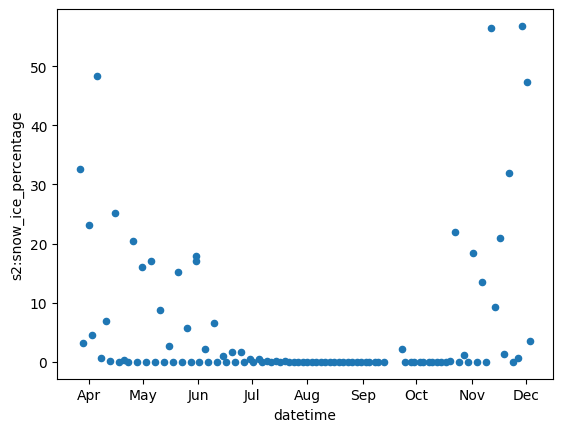

In [3]:
from matplotlib.dates import DateFormatter

axis = data_frame.plot(x="datetime", y="s2:snow_ice_percentage", kind="scatter")
axis.xaxis.set_major_formatter(DateFormatter("%b"))